In [2]:
import matplotlib.pyplot as plt
# from mpl_toolkits.axisartist.axislines import SubplotZero
# import matplotlib.patches as patches
import random
import math
import copy
import time
import sys

import numpy as np
# import tensorflow as tf

import os

np.random.seed(1)

plt.rc('font',family='Times New Roman',size=20)
# plt.rc('lines', linewidth=3)

floder="VLDB2024"
random.seed(10)
bit_letters = ["A", "B", "C", "D", "E"]
factor_letters = ["a", "b", "c", "d", "e"]
logger_print = True
# value_letters = ["x", "y", "z"]
from time import perf_counter
plt.rcParams['hatch.linewidth'] = 2
# plt.rcParams['mathtext.default'] = 'DejaVu Sans'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'

# Font sizes
title_fontsize = 28
label_fontsize = 28
tick_fontsize = 28
annotation_fontsize = 18
markersize=12
# colors = ['bisque', 'aquamarine', 'cornflowerblue']
colors = ['silver','red', 'cornflowerblue', 'orange','orchid','limegreen','brown']
patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O']
# markers=['o','^','s']
# colors = ['blue', 'green', 'red']
linewidth=4
plt.rcParams["figure.figsize"] = (6,2)

markers = [
    'o',  # circle marker
    '*',  # star marker
    's',  # square marker
    'v',  # triangle_down marker
    
    'D',  # hexagon2 marker
    'p',  # pentagon marker
    '>',  # triangle_right marker
    '1',  # tri_down marker
    'h',  # hexagon1 marker
'+',  # tri_right marker
    '+',  # plus marker
    'x',  # x marker
    'D',  # diamond marker
    'd',  # thin_diamond marker
    '|',  # vline marker
    '_'   # hline marker
]

In [3]:
class QueryRes:
    def __init__(self, layout, name):
        self.layout = layout
        self.name = name
        self.items = []

    def __repr__(self):
        items_repr = ', '.join([repr(item) for item in self.items])
        return f"QueryRes(layout='{self.layout}', name='{self.name}', items=[{items_repr}])"

    def print_details(self):
        print(f"Layout: {self.layout}, Name: {self.name}")
        for item in self.items:
            item.print_details()


In [5]:
class QueryResItem:
    def __init__(self, query, time, IO):
        self.query = query
        self.time = int(time)
#         self.file_read = int(file_read)
        self.IO = float(IO)

    def __repr__(self):
        return f"QueryResItem(query='{self.query}', time={self.time}, IO='{self.IO}')"

    def print_details(self):
        print(f"Query: {self.query}, Time: {self.time} ms, IO: {self.IO} Mb")


In [18]:
class ResReader:
    def __init__(self, file):
        self.file = file
        self._read()
        
    def _read(self):
        with open(self.file, 'r') as file:
            data = json.load(file)

        self.res = QueryRes(data['layout'], data['name'])

        self.res.items = [QueryResItem(m['query'], m['cpuTime'], m['IO']) for m in data['measurements']]

    def getTime(self, query=None):
        if query:
            for item in self.res.items:
                if item.query == query:
                    return item.time
        return [item.time for item in self.res.items]
    
    def getIO(self, query=None):
        if query:
            for item in self.res.items:
                if item.query == query:
                    return item.IO
        return [item.IO for item in self.res.items]
        
    def getFileRead(self, query=None):
        if query:
            for item in self.res.items:
                if item.query == query:
                    return item.file_read
        return [item.file_read for item in self.res.items]

In [6]:
def print_percentage(data):
    reduction_percentages = []
    for baseline in data[1:]:
        reduction_percentage = [(baseline[i] - data[0][i]) / baseline[i] * 100 for i in range(len(data[0]))]
        reduction_percentages.append(reduction_percentage)

    for item in reduction_percentages:
        print(item)

In [8]:
# import json

# file_path = '../hudi/result/legacy/tpc_1_bmc.json'

# with open(file_path, 'r') as file:
#     data = json.load(file)
    
# res = QueryRes(data['layout'], data['name'])

# res.items = [QueryResItem(m['query'], m['cpuTime'], m['IO']) for m in data['measurements']]

# res.print_details()


JSONDecodeError: Expecting value: line 7 column 1 (char 122)

In [9]:
path = '../hudi/result/legacy/'
bmc = ['tpc_1_bmc.json', 'tpc_2_bmc.json', 'tpc_4_bmc.json', 'tpc_8_bmc.json', 'tpc_16_bmc.json']
linear = ['tpc_1_linear.json', 'tpc_2_linear.json', 'tpc_4_linear.json', 'tpc_8_linear.json', 'tpc_16_linear.json']
z = ['tpc_1_z-order.json', 'tpc_2_z-order.json', 'tpc_4_z-order.json', 'tpc_8_z-order.json', 'tpc_16_z-order.json']
hilbert = ['tpc_1_hilbert.json', 'tpc_2_hilbert.json', 'tpc_4_hilbert.json', 'tpc_8_hilbert.json', 'tpc_16_hilbert.json']
QUILTS = ['tpc_1_QUILTS.json', 'tpc_2_QUILTS.json', 'tpc_4_QUILTS.json', 'tpc_8_QUILTS.json', 'tpc_16_QUILTS.json']

In [12]:
bmc_reader = ResReader(path + bmc[-1])
LBMC = bmc_reader.getTime()

linear_reader = ResReader(path + linear[-1])
LBMC = linear_reader.getTime()

z_reader = ResReader(path + z[-1])
LBMC = z_reader.getTime()

h_reader = ResReader(path + hilbert[-1])
LBMC = h_reader.getTime()

q_reader = ResReader(path + QUILTS[-1])
LBMC = q_reader.getTime()

[4030.15, 996.16, 2023.87, 2038.07, 995.92]
[3897.78, 990.89, 2009.4, 1915.83, 991.05]
[3895.69, 990.72, 2008.16, 1914.96, 990.01]
[3146.65, 783.83, 1588.75, 1579.5, 783.32]
[3627.65, 883.83, 1788.75, 1779.5, 881.92]
[21.922260958028858, 21.314849020237705, 21.499404606027063, 22.500208530619652, 21.347096152301383]
[19.270713072569514, 20.896365893287847, 20.934109684482934, 17.555315450744583, 20.960597346248917]
[19.22740259106859, 20.882792312661497, 20.885288024858582, 17.517859380874796, 20.877566893263698]
[13.259272531804337, 11.314393039385402, 11.180992313067785, 11.239112110143298, 11.180152394775027]


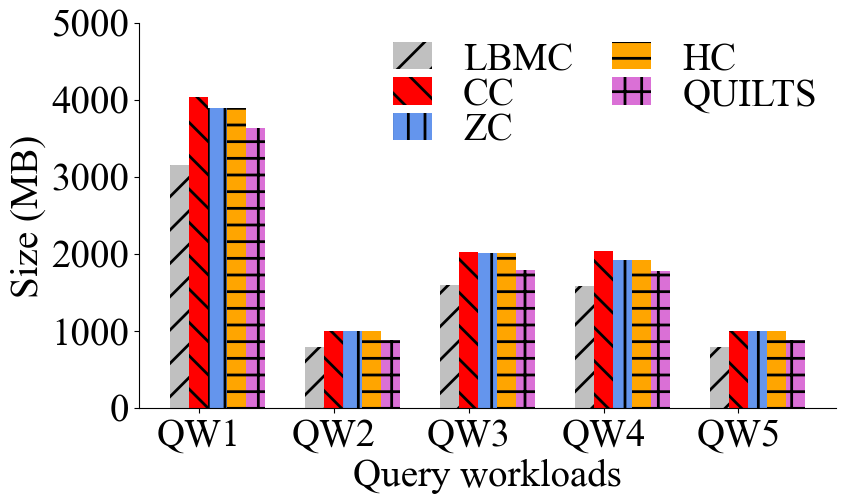

In [13]:
import matplotlib.pyplot as plt
import numpy as np
x_labels = ["QW1", "QW2", "QW3", "QW4", "QW5"]

labels = ["LBMC", 'CC', 'ZC', 'HC', 'QUILTS']

LC = linear_reader.getIO()
ZC = z_reader.getIO() 
HC = h_reader.getIO()
LBMC = bmc_reader.getIO()
QUILTS = q_reader.getIO()

print(LC)
print(ZC)
print(HC)
print(LBMC)
print(QUILTS)


all_methods = [
    LBMC,
    LC,
    ZC,
    HC,
    QUILTS
]

print_percentage(all_methods)

# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 1.0


# Set up figure and axes
fig, ax = plt.subplots(figsize=(9, 5))

# Width of the bars
width = 0.14
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(x_labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]

rs = [r1, r2, r3, r4, r5]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
    rects1 = ax.bar(rs[i], all_methods[i], width, label=labels[i], hatch=patterns[i], alpha=bar_alpha, color=colors[i])
    # patterns

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Query workloads', fontsize=label_fontsize)
ax.set_ylabel('Size (MB)', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + width for r in range(len(x_labels))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
ax.set_xticklabels(x_labels, fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Add y-axis labels at specific positions
y_labels = [0, 1000, 2000, 3000, 4000, 5000]
ax.set_yticks(y_labels)
# ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

ax.legend(ncol=2, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=1, fontsize=tick_fontsize, fancybox=True, framealpha=0)

plt.savefig('../figs/exp3/hudi_tpc_qw_IO.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


[7.811687636477071, 42.24918817296189, 5.495283018867925, 40.30458033015577, 32.99771781447174]
[22.444561081222936, 59.30386607250392, 34.87023893373788, 39.259522119706645, 57.476356820311835]
[21.91518407609653, 58.52461028599485, 35.074264110180934, 38.63527724665392, 54.99549143372408]
[5.338600752742706, 41.122146715455656, 7.679901697258275, 36.87768899815612, 28.608210556429697]
[[35.463, 3.379, 12.021, 5.135, 4.991], [38.468, 5.851, 12.72, 8.602, 7.449], [45.726, 8.303, 18.457, 8.454, 11.737], [45.416, 8.147, 18.515, 8.368, 11.09], [37.463, 5.739, 13.021, 8.135, 6.991]]


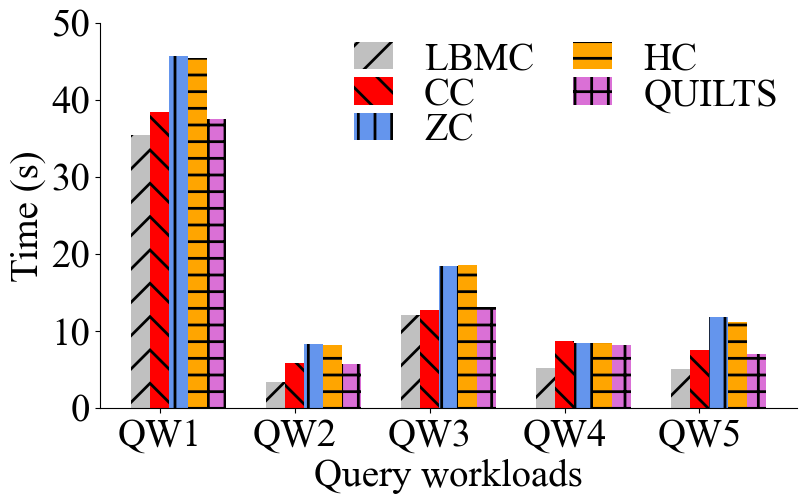

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x_labels = ["QW1", "QW2", "QW3", "QW4", "QW5"]

labels = ["LBMC", 'CC', 'ZC', 'HC', 'QUILTS']

dataset_sizes = [1, 2, 4, 8, 16]

LC = linear_reader.getTime()
ZC = z_reader.getTime() 
HC = h_reader.getTime()
LBMC = bmc_reader.getTime()
QUILTS = q_reader.getTime()

all_methods = [
    LBMC,
    LC,
    ZC,
    HC,
    QUILTS
]


print_percentage(all_methods)

all_methods = [[item / 1000 for item in row] for row in all_methods]

print(all_methods)


# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 1.0


# Set up figure and axes
fig, ax = plt.subplots(figsize=(9, 5))

# Width of the bars
width = 0.14
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(dataset_sizes))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]

rs = [r1, r2, r3, r4, r5]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
    rects1 = ax.bar(rs[i], all_methods[i], width, label=labels[i], hatch=patterns[i], alpha=bar_alpha, color=colors[i])
    patterns

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Query workloads', fontsize=label_fontsize)
ax.set_ylabel('Time (s)', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + width for r in range(len(dataset_sizes))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
ax.set_xticklabels(x_labels, fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# Add y-axis labels at specific positions
y_labels = [0, 10, 20, 30, 40, 50]
ax.set_yticks(y_labels)
# ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

ax.legend(ncol=2, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=1, fontsize=tick_fontsize, fancybox=True, framealpha=0)

plt.savefig('../figs/exp3/hudi_tpc_qw_time.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


In [50]:
path = '../hudi/result/legacy/'

bmc = ['tpc_1_bmc.json', 'tpc_2_bmc.json', 'tpc_4_bmc.json', 'tpc_8_bmc.json', 'tpc_16_bmc.json']
linear = ['tpc_1_linear.json', 'tpc_2_linear.json', 'tpc_4_linear.json', 'tpc_8_linear.json', 'tpc_16_linear.json']
z = ['tpc_1_z-order.json', 'tpc_2_z-order.json', 'tpc_4_z-order.json', 'tpc_8_z-order.json', 'tpc_16_z-order.json']
hilbert = ['tpc_1_hilbert.json', 'tpc_2_hilbert.json', 'tpc_4_hilbert.json', 'tpc_8_hilbert.json', 'tpc_16_hilbert.json']
QUILTS = ['tpc_1_QUILTS.json', 'tpc_2_QUILTS.json', 'tpc_4_QUILTS.json', 'tpc_8_QUILTS.json', 'tpc_16_QUILTS.json']

bmc_readers = [ResReader(path + file) for file in bmc]
linear_readers = [ResReader(path + file) for file in linear]
z_readers = [ResReader(path + file) for file in z]
hilbert_readers = [ResReader(path + file) for file in hilbert]
q_readers = [ResReader(path + file) for file in QUILTS]


[[49.24, 92.5, 192.61, 388.18, 783.32], [84.85, 125.09, 244.12, 488.67, 995.92], [81.25, 124.65, 251.1, 500.46, 991.05], [81.17, 124.5, 250.29, 497.0, 990.01], [56.2, 102.48, 219.55, 438.7, 881.92]]


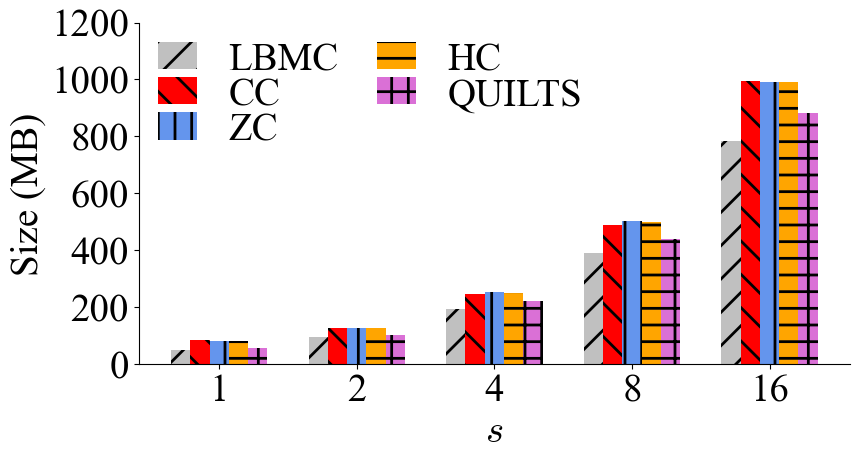

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes and time saved scores
# dataset_sizes = [1, 10, 100, 1000, 10000]
x_labels = ["1", "2", "4", "8", "16"]


labels = ['LBMC', 'CC', 'ZC', 'HC', 'QUILTS']


LBMC = [bmc_reader.getIO("Q5") for bmc_reader in bmc_readers]
LC = [linear_reader.getIO("Q5") for linear_reader in linear_readers]
ZC = [z_reader.getIO("Q5") for z_reader in z_readers]
HC = [hilbert_reader.getIO("Q5") for hilbert_reader in hilbert_readers]
QUILTS = [q_reader.getIO("Q5") for q_reader in q_readers]

all_methods = [
    LBMC,
    LC,
    ZC,
    HC,
    QUILTS
]
print(all_methods)


# print_percentage(all_methods)


# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 1.0


# Set up figure and axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Width of the bars
width = 0.14

# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(x_labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
rs = [r1, r2, r3, r4, r5]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
    rects1 = ax.bar(rs[i], all_methods[i], width, hatch=patterns[i],label=labels[i], alpha=bar_alpha, color=colors[i])

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


# ax.set_yscale('log')
ax.set_xlabel('$s$', fontsize=label_fontsize)
ax.set_ylabel('Size (MB)', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + int(len(rs) / 2)*width for r in range(len(all_methods[0]))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)


ax.set_xticklabels(x_labels, fontsize=tick_fontsize)

# ax.set_ylim(1, 100000)
y_labels = [0, 200, 400, 600, 800, 1000, 1200]
ax.set_yticks(y_labels)

# ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

# ax.legend(fontsize=tick_fontsize)

# Place legend to the right of the plot
# plt.legend(loc='upper left', fontsize=tick_fontsize, bbox_to_anchor=(1, 1))
ax.legend(ncol=2, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=1, fontsize=tick_fontsize, fancybox=True, framealpha=0)

# Adjust the layout to make room for the legend
plt.tight_layout()

plt.savefig('../figs/exp3/hudi_tpc_vary_datasize_IO.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


[45.91439688715953, 60.75824716888233, 53.6808735470236, 45.31324725011956, 32.99771781447174]
[52.68085106382979, 70.12743628185906, 63.99233296823659, 64.35473815461347, 57.476356820311835]
[45.5435847208619, 68.96417445482867, 68.45766370832334, 62.38486842105263, 54.99549143372408]
[39.49945593035908, 39.939713639789, 24.72810532341156, 29.391787588761964, 28.608210556429697]
[[0.556, 0.797, 1.315, 2.287, 4.991], [1.028, 2.031, 2.839, 4.182, 7.449], [1.175, 2.668, 3.652, 6.416, 11.737], [1.021, 2.568, 4.169, 6.08, 11.09], [0.919, 1.327, 1.747, 3.239, 6.991]]


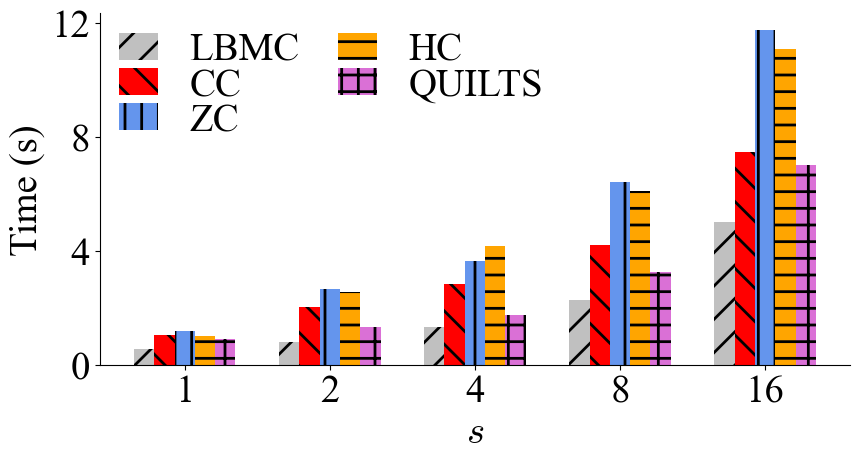

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset sizes and time saved scores
# dataset_sizes = [1, 10, 100, 1000, 10000]

x_labels = ["1", "2", "4", "8", "16"]


labels = ['LBMC', 'CC', 'ZC', 'HC', 'QUILTS']

LBMC = [bmc_reader.getTime("Q5") for bmc_reader in bmc_readers]
LC = [linear_reader.getTime("Q5") for linear_reader in linear_readers]
ZC = [z_reader.getTime("Q5") for z_reader in z_readers]
HC = [hilbert_reader.getTime("Q5") for hilbert_reader in hilbert_readers]
QUILTS = [q_reader.getTime("Q5") for q_reader in q_readers]

all_methods = [
    LBMC,
    LC,
    ZC,
    HC,
    QUILTS
]

print_percentage(all_methods)


all_methods = [[item / 1000 for item in row] for row in all_methods]

print(all_methods)


# Define color and font size variables
color_A = 'blue'
color_B = 'orange'
bar_alpha = 1.0


# Set up figure and axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Width of the bars
width = 0.14

# Create an array with the position of each bar along the x-axis
r1 = np.arange(len(x_labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
rs = [r1, r2, r3, r4, r5]


for i in range(len(all_methods)):
# Plot time saved comparison chart with semi-transparent bars
    rects1 = ax.bar(rs[i], all_methods[i], width, hatch=patterns[i],label=labels[i], alpha=bar_alpha, color=colors[i])

#     for rect in rects1:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


# ax.set_yscale('log')
ax.set_xlabel('$s$', fontsize=label_fontsize)
ax.set_ylabel('Time (s)', fontsize=label_fontsize)
# ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
ax.set_xticks([r + int(len(rs) / 2)*width for r in range(len(all_methods[0]))])
# ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
# ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)

# Set tick font sizes
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)


ax.set_xticklabels(x_labels, fontsize=tick_fontsize)

y_labels = [0, 4, 8, 12]
ax.set_yticks(y_labels)

# ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

# ax.legend(fontsize=tick_fontsize)

# Place legend to the right of the plot
# plt.legend(loc='upper left', fontsize=tick_fontsize, bbox_to_anchor=(1, 1))
# plt.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)
ax.legend(ncol=2, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=1, fontsize=tick_fontsize, fancybox=True, framealpha=0)

# Adjust the layout to make room for the legend
plt.tight_layout()

plt.savefig('../figs/exp3/hudi_tpc_vary_datasize_time.pdf',format='pdf',bbox_inches = 'tight')    

plt.show()


In [54]:
bmc_nyc = '../hudi/result/legacy/nyc_bmc.json'
hilbert_nyc = '../hudi/result/legacy/nyc_hilbert.json'
linear_nyc = '../hudi/result/legacy/nyc_linear.json'
z_nyc = '../hudi/result/legacy/nyc_z-order.json'
quilts = '../hudi/result/legacy/nyc_QUILTS.json'

bmc_reader = ResReader(bmc_nyc)
linear_reader = ResReader(linear_nyc)
z_reader = ResReader(z_nyc)
h_reader = ResReader(hilbert_nyc)
q_reader = ResReader(quilts)

[0.49459514582908365, 0.41875191502399817, 0.41941910454021775, 0.4281821720513797, 0.41076880377463726]
[-32.166198232365986, -32.42784380305603, -32.43620136661555, -32.58465791292328, -32.43522551118328]
[0.423512603326862, 0.33731984053971, 0.3410462248806368, 0.35060381768602805, 0.3333148158435611]
[9.721740337242379, 9.504362353814736, 5.699533313474327, 13.30772706732942, 7.848374338692281]


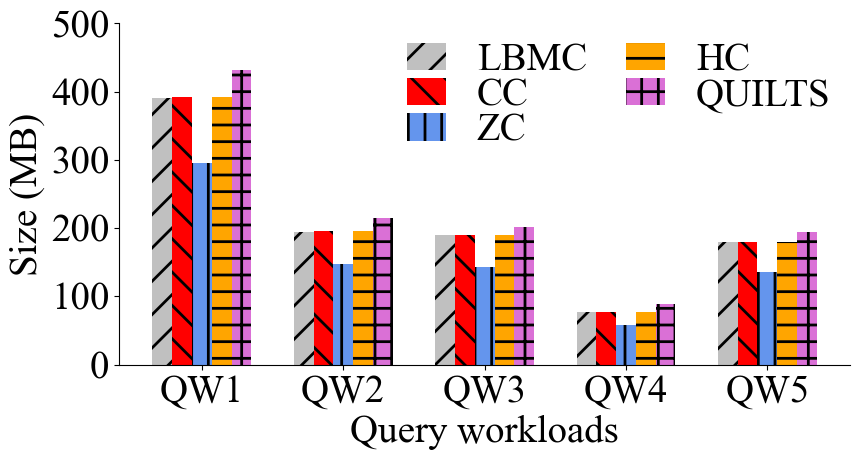

In [56]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Dataset sizes and time saved scores
# # dataset_sizes = [1, 10, 100, 1000, 10000]
# x_labels = ["QW1", "QW2", "QW3", "QW4", "QW5"]

# labels = ['LBMC', 'CC', 'ZC', 'HC', 'QUILTS']

# LC = linear_reader.getIO()
# ZC = z_reader.getIO() 
# HC = h_reader.getIO()
# LBMC = bmc_reader.getIO()
# QUILTS = q_reader.getIO()




# all_methods = [
#     LBMC,
#     LC,
#     ZC,
#     HC,
#     QUILTS
# ]


# print_percentage(all_methods)



# # Define color and font size variables
# color_A = 'blue'
# color_B = 'orange'
# bar_alpha = 1.0


# # Set up figure and axes
# fig, ax = plt.subplots(figsize=(9, 5))
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# # Width of the bars
# width = 0.14

# # Create an array with the position of each bar along the x-axis
# r1 = np.arange(len(x_labels))
# r2 = [x + width for x in r1]
# r3 = [x + width for x in r2]
# r4 = [x + width for x in r3]
# r5 = [x + width for x in r4]
# rs = [r1, r2, r3, r4, r5]


# for i in range(len(all_methods)):
# # Plot time saved comparison chart with semi-transparent bars
#     rects1 = ax.bar(rs[i], all_methods[i], width, hatch=patterns[i],label=labels[i], alpha=bar_alpha, color=colors[i])

# #     for rect in rects1:
# #         height = rect.get_height()
# #         ax.annotate(f'{height}',
# #                     xy=(rect.get_x() + rect.get_width() / 2, height),
# #                     xytext=(0, 3),  # 3 points vertical offset
# #                     textcoords="offset points",
# #                     ha='center', va='bottom', fontsize=annotation_fontsize, rotation=70)


# # ax.set_yscale('log')
# ax.set_xlabel('Query workloads', fontsize=label_fontsize)
# ax.set_ylabel('Size (MB)', fontsize=label_fontsize)
# # ax.set_title('Time Saved Comparison of Methods A and B', fontsize=tick_fontsize)
# ax.set_xticks([r + int(len(rs) / 2)*width for r in range(len(all_methods[0]))])
# # ax.set_xticklabels(dataset_sizes, fontsize=tick_fontsize)
# # ax.set_xticklabels([f'$10^{int(np.log10(size))}$' for size in dataset_sizes], fontsize=tick_fontsize)

# # Set tick font sizes
# ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)


# ax.set_xticklabels(x_labels, fontsize=tick_fontsize)

# # ax.set_ylim(1, 100000)
# y_labels = [0, 100, 200, 300, 400, 500]
# ax.set_yticks(y_labels)

# # ax.set_yticklabels([f'$10^{int(np.log10(size))}$' for size in y_labels], fontsize=tick_fontsize)

# # ax.legend(fontsize=tick_fontsize)

# # Place legend to the right of the plot
# # plt.legend(loc='upper left', fontsize=tick_fontsize, bbox_to_anchor=(1, 1))
# # plt.legend(ncol=7, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=2, fancybox=True, framealpha=0)
# ax.legend(ncol=2, labelspacing=0.0, columnspacing=1, borderpad=0, handlelength=1, fontsize=tick_fontsize, fancybox=True, framealpha=0)

# # Adjust the layout to make room for the legend
# plt.tight_layout()

# plt.savefig('../figs/exp3/hudi_nyc_qw_IO.pdf',format='pdf',bbox_inches = 'tight')    

# plt.show()
